In [2]:
"""Quantum Teleportation.
Quantum Teleportation is a process by which a quantum state can be transmitted
by sending only two classical bits of information. This is accomplished by
pre-sharing an entangled state between the sender (Alice) and the receiver
(Bob). This entangled state allows the receiver (Bob) of the two classical
bits of information to possess a qubit with the same state as the one held by
the sender (Alice).
In the following example output, qubit 0 (the Message) is set to a random state
by applying X and Y gates. By sending two classical bits of information after
qubit 0 (the Message) and qubit 1 (Alice's entangled qubit) are measured, the
final state of qubit 2 (Bob's entangled qubit) will be identical to the
original random state of qubit 0 (the Message). This is only possible given
that an entangled state is pre-shared between Alice and Bob.
=== REFERENCE ===
https://en.wikipedia.org/wiki/Quantum_teleportation
https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.1895
=== EXAMPLE OUTPUT ===
Circuit:
0: -----------X^0.25---Y^0.125---@---H---M-------@---
                                 |       |       |
1: ---H---@----------------------X-------M---@---|---
          |                                  |   |
2: -------X----------------------------------X---@---
Bloch Sphere of Message After Random X and Y Gates:
x:  0.2706 y:  -0.7071 z:  0.6533
Bloch Sphere of Qubit 2 at Final State:
x:  0.2706 y:  -0.7071 z:  0.6533
"""

import random
import numpy as np
import cirq


def make_quantum_teleportation_circuit(ranX, ranY):
    circuit = cirq.Circuit()
    msg, alice, bob = cirq.LineQubit.range(3)

    # Creates Bell state to be shared between Alice and Bob
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])
    # Creates a random state for the Message
    circuit.append([cirq.X(msg)**ranX, cirq.Y(msg)**ranY])
    # Bell measurement of the Message and Alice's entangled qubit
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg)])
    circuit.append(cirq.measure(msg, alice))
    # Uses the two classical bits from the Bell measurement to recover the
    # original quantum Message on Bob's entangled qubit
    circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob)])

    return circuit


def main():
    ranX = random.random()
    ranY = random.random()
    circuit = make_quantum_teleportation_circuit(ranX, ranY)

    print("Circuit:")
    print(circuit)

    sim = cirq.Simulator()

    # Create qubits.
    q0 = cirq.LineQubit(0)

    # Produces the message using random X and Y gates
    message = sim.simulate(cirq.Circuit([cirq.X(q0)**ranX, cirq.Y(q0)**ranY]))

    print("\nBloch Sphere of Message After Random X and Y Gates:")
    # Prints the Bloch Sphere of the Message after the X and Y gates
    expected = cirq.bloch_vector_from_state_vector(message.final_state, 0)
    print("x: ", np.around(expected[0], 4), "y: ", np.around(expected[1], 4),
          "z: ", np.around(expected[2], 4))

    # Records the final state of the simulation
    final_results = sim.simulate(circuit)

    print("\nBloch Sphere of Qubit 2 at Final State:")
    # Prints the Bloch Sphere of Bob's entangled qubit at the final state
    teleported = cirq.bloch_vector_from_state_vector(final_results.final_state,
                                                     2)
    print("x: ", np.around(teleported[0], 4), "y: ",
          np.around(teleported[1], 4), "z: ", np.around(teleported[2], 4))

    return expected, teleported


if __name__ == '__main__':
    main()

Circuit:
0: ───X^0.355───Y^0.514───@───H───M───────@───
                          │       │       │
1: ───H─────────@─────────X───────M───@───┼───
                │                     │   │
2: ─────────────X─────────────────────X───@───

Bloch Sphere of Message After Random X and Y Gates:
x:  0.4388 y:  -0.8984 z:  -0.0189

Bloch Sphere of Qubit 2 at Final State:
x:  0.4388 y:  -0.8984 z:  -0.0189


In [1]:
import cirq
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from cirq.ops import CZ, H, X, CX
from cirq.aqt.aqt_device import get_aqt_device
from cirq.aqt.aqt_sampler import AQTSampler
access_token = '2633b2d14dae4d9da7c9df2503857334'
msg = cirq.LineQubit(0)
print('message is {0} of type {1}'.format(msg, type(msg)))

message is 0 of type <class 'cirq.devices.line_qubit.LineQubit'>


In [2]:
import random
ranX = random.random()
ranY = random.random()
#ranq = cirq.X(msg)**ranX, cirq.Y(msg)**ranY
ranq = cirq.H(msg)

In [3]:
circuit = cirq.Circuit()
circuit.append(ranq)
print(circuit)

0: ───H───


In [4]:
import numpy as np
sim = cirq.Simulator()
original_message = sim.simulate(circuit)
expected = cirq.bloch_vector_from_state_vector(original_message.final_state, 0)
print("x: ", np.around(expected[0], 4), "y: ", np.around(expected[1], 4),
          "z: ", np.around(expected[2], 4))

x:  1.0 y:  0.0 z:  0.0


In [5]:
alice, bob = cirq.LineQubit.range(1, 3)
circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])
print(circuit)

0: ───H───────

1: ───H───@───
          │
2: ───────X───


In [6]:
circuit.append([cirq.CNOT(msg, alice), cirq.H(msg)])
print(circuit)

0: ───H───────@───H───
              │
1: ───H───@───X───────
          │
2: ───────X───────────


In [7]:
circuit.append(cirq.measure(msg, alice))
print(circuit)

0: ───H───────@───H───M───
              │       │
1: ───H───@───X───────M───
          │
2: ───────X───────────────


In [8]:
circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob)])
print(circuit)

0: ───H───────@───H───M───────@───
              │       │       │
1: ───H───@───X───────M───@───┼───
          │               │   │
2: ───────X───────────────X───@───


In [9]:
final_results = sim.simulate(circuit)
teleported = cirq.bloch_vector_from_state_vector(final_results.final_state, 2)
print("x: ", np.around(teleported[0], 4), "y: ", np.around(teleported[1], 4), "z: ", np.around(teleported[2], 4))

x:  1.0 y:  0.0 z:  0.0


In [10]:
circuit.append([cirq.measure(bob)])
results = sim.run(circuit, repetitions=500)

In [11]:
print(results)

0,1=00011000111001101010100010101000001101110110011001011101011110111011100011111001011100101101100001100100001111000001000010100100001110100111011001011111010101001011101010010110100010110101000000010100100111100110111000111111110001110010100010101010011010110110010011111100101110111001010011001110000101100011011101100110010111000001000000001111111110011111011000100000101100101010111011010010100100101100000110010100010101000110001100010001001000001111110011010111111011110011010100111001111100010011, 01110001001000110100100000101110101100110110001010100001110111011100100101011010010010101110011100111010111110100010000001100111101011010010010011111001100000010100001101011010101001110100111100100101010010001111111011011010101000011101111000001000101100100000101010011101111100001000101100111110100111000101011110001100111011010010001000110010100001011101110000001110101110000110110101001010100001010111101101000011101011001111000001101101111100010000100111000101011000100000110001001110000101

Counter({(1,): 264, (0,): 236})


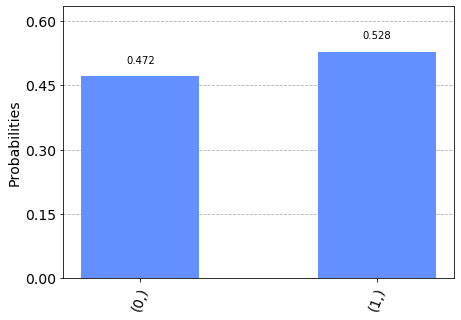

In [12]:
counts = cirq.TrialResult.multi_measurement_histogram(results,keys=['2'])
print(counts)
plot_histogram(counts)